# Stock Price Analysis of Bitcoin

In this project, we will analyze the historical stock prices of a company (you can replace 'XYZ' with the actual stock symbol of the company you want to analyze). We will perform the following tasks:

1. Fetch historical stock price data from Yahoo Finance.
2. Perform data cleaning and preprocessing.
3. Calculate basic statistics of the stock prices.
4. Visualize the stock price data.

In this project, we will analysis particularly on Bitcoin (BTC).

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the stock symbol and date range for analysis
stock_symbol = "BTC"  # Replace with the actual stock symbol
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


## Data Analysis

In [42]:
# Calculate 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Adj Close'].rolling(window=200).mean()

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()
stock_data['Daily_Return'] = stock_data['Daily_Return'].fillna(0)  # Replace NaN with 0 for the first entry

# Basic Statistics
mean_price = stock_data["Adj Close"].mean()
std_price = stock_data["Adj Close"].std()
max_price = stock_data["Adj Close"].max()
min_price = stock_data["Adj Close"].min()

print("Basic Statistics:")
print(f"Mean Price: {mean_price:.2f}")
print(f"Standard Deviation: {std_price:.2f}")
print(f"Max Price: {max_price:.2f}")
print(f"Min Price: {min_price:.2f}")


Basic Statistics:
Mean Price: 93.92
Standard Deviation: 3.08
Max Price: 97.12
Min Price: 86.84


## Data Visualizations

We plot the data into graphs to analyze and visualize: "Stock Price Analysis for BTC" and "Daily Returns for BTC".

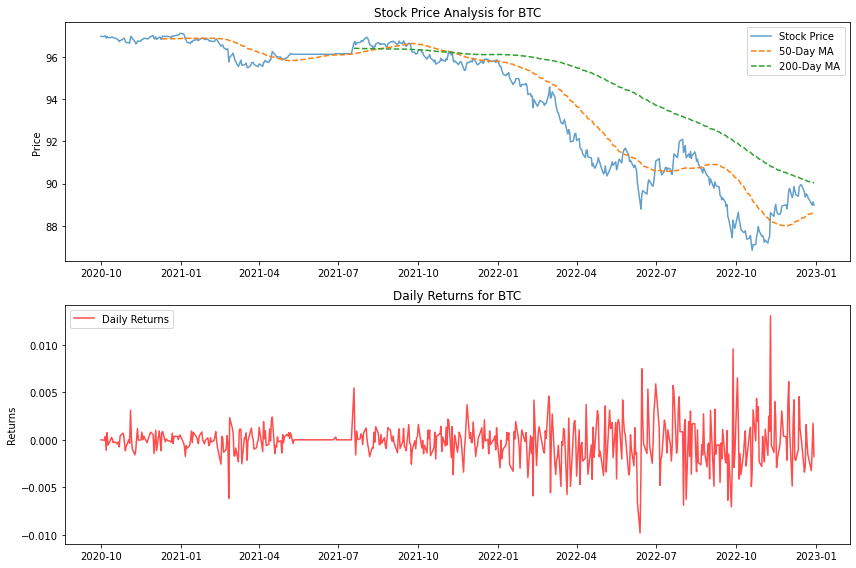

In [48]:
# Visualizations
plt.figure(figsize=(12, 8))

# Plot stock price with moving averages
plt.subplot(2, 1, 1)
plt.plot(stock_data.index, stock_data["Adj Close"], alpha=0.7, label="Stock Price")
plt.plot(stock_data.index, stock_data["MA50"], linestyle="--", label="50-Day MA")
plt.plot(stock_data.index, stock_data["MA200"], linestyle="--", label="200-Day MA")
plt.title(f"Stock Price Analysis for {stock_symbol}")
plt.ylabel("Price")
plt.legend()

# Plot daily returns
plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['Daily_Return'], color='red', alpha=0.7, label="Daily Returns")
plt.title(f"Daily Returns for {stock_symbol}")
plt.ylabel("Returns")
plt.legend()

plt.tight_layout()
plt.show()


## Data Prediction 

Here, we use two mechine learning techniques to predict the future stock price: SARIMAX and Linear Regression

In [43]:
# Time-series analysis with SARIMAX
model = SARIMAX(stock_data['Adj Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=0)

# Predict future prices using SARIMAX
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


/Users/sherylshunlin/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sherylshunlin/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sherylshunlin/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
# Linear Regression for future price prediction
stock_data['Date'] = stock_data.index
X = np.arange(len(stock_data)).reshape(-1, 1)
y = stock_data['Adj Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict future prices using Linear Regression
future_X = np.arange(len(stock_data), len(stock_data) + forecast_steps + 1).reshape(-1, 1)
linear_regression_forecast = regression_model.predict(future_X)



## Data Prediction: Visualization

In [56]:

# Print the SARIMAX and Linear Regression forecasts
print("SARIMAX Forecast:")
print(forecast_mean)

print("Linear Regression Forecast:")
print(linear_regression_forecast)


SARIMAX Forecast:
567    88.900072
568    88.961968
569    88.894184
570    88.972692
571    88.947982
572    88.821377
573    88.896494
574    88.901351
575    88.859913
576    88.814058
577    88.818307
578    88.880876
579    88.864716
580    88.920311
581    88.851168
582    88.866845
583    88.809792
584    88.729710
585    88.787758
586    88.768045
587    88.684633
588    88.634239
589    88.664119
590    88.689083
591    88.662643
592    88.719334
593    88.650426
594    88.676794
595    88.625245
596    88.537245
Name: predicted_mean, dtype: float64
Linear Regression Forecast:
[89.02568263 89.00854297 88.99140331 88.97426365 88.95712399 88.93998433
 88.92284467 88.90570501 88.88856535 88.8714257  88.85428604 88.83714638
 88.82000672 88.80286706 88.7857274  88.76858774 88.75144808 88.73430842
 88.71716876 88.7000291  88.68288944 88.66574978 88.64861012 88.63147046
 88.6143308  88.59719114 88.58005148 88.56291182 88.54577216 88.52863251
 88.51149285]


<ipython-input-57-3aa1c01b1809>:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=end_date, periods=forecast_steps + 1, closed='right')


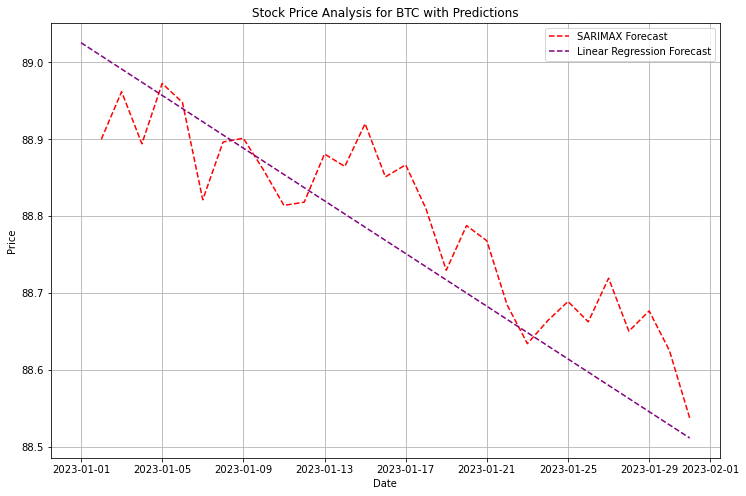

In [57]:
# Plotting stock price with moving averages, SARIMAX prediction, and Linear Regression prediction
plt.figure(figsize=(12, 8))

forecast_index = pd.date_range(start=end_date, periods=forecast_steps + 1, closed='right')
plt.plot(forecast_index, forecast_mean, linestyle="--", color='red', label="SARIMAX Forecast")
linear_reg_forecast_index = pd.date_range(start=end_date, periods=forecast_steps + 1)
plt.plot(linear_reg_forecast_index, linear_regression_forecast, linestyle="--", color='purple', label="Linear Regression Forecast")
plt.title(f"Stock Price Analysis for {stock_symbol} with Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
